<a href="https://colab.research.google.com/github/wangjuan001/sandbox2019/blob/master/Copy_of_Part_2_SampleAnswers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code it: Cleaning Shakespeare


### Timings

Shakespeare is much bigger than Walden, and so it takes a lot longer to process the text. Just to demonstrate where the biggest slowdowns are, I split the sample code up into chunks and time each one.

**Can you guess which part of the text cleaning process will take the longest?**

## Sample code

In [ ]:
## FOR GOOGLE COLAB
# If you are using Google Colab, first run the code cell below. You can run a cell by clicking in the cell and clicking on the arrow that appears on the left side of the cell. DO NOT run this cell if you are not using Google Colab.

!wget "https://raw.githubusercontent.com/turnerdan/nltk_tutorial_2020/master/shakespeare.txt"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/shakespeare_raw.pkl?raw=true"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/shakespeare_text.pkl?raw=true"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/shakespeare_tokens.pkl?raw=true"
!wget "https://raw.githubusercontent.com/turnerdan/nltk_tutorial_2020/master/walden.txt"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/walden_clean_tokens.pkl?raw=true"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/walden_raw.pkl?raw=true"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/walden_text.pkl?raw=true"


--2020-08-13 17:51:22--  https://raw.githubusercontent.com/turnerdan/nltk_tutorial_2020/master/shakespeare.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5784660 (5.5M) [text/plain]
Saving to: ‘shakespeare.txt’

shakespeare.txt     100%[===================>]   5.52M  33.7MB/s    in 0.2s    

2020-08-13 17:51:23 (33.7 MB/s) - ‘shakespeare.txt’ saved [5784660/5784660]

--2020-08-13 17:51:23--  https://github.com/turnerdan/nltk_tutorial_2020/blob/master/shakespeare_raw.pkl?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/turnerdan/nltk_tutorial_2020/raw/master/shakespeare_raw.pkl [following]
--2020-08

In [ ]:

#######################
## Setup environment ##
#######################

# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from scipy import special
from nltk import *
from nltk.corpus import stopwords

# Will will time all functions to see what takes longest with the help of the 'time' package
import time 

In [ ]:
# Save the current time (according to the computer) as the variable 't0'.
# We will consider this the start time and subtract it from the time at the end of the block.
t0 = time.time() 

######################
## Read-in the file ##
######################
# What is the path to the complete works of Shakespeare?
shakespeare_path = 'shakespeare.txt'

# Open the file at the specified path
shakespeare_file = open( shakespeare_path, 'r')

# Read the file as raw text
shakespeare_raw = shakespeare_file.read()

# Close the original file
shakespeare_file.close()

t1 = time.time() # End time


In [ ]:
# Print the time elapsed between t0 and the current time
print( "This block took", round( t1-t0 ), "seconds to complete." ) # 0s

## We use this data for another Code it, so let's save a copy
# Write the tokens to /working/ folder 
with open('shakespeare_raw.pkl', 'wb') as f:
    pickle.dump( shakespeare_raw , f )

This block took 0 seconds to complete.


In [ ]:
download('punkt')
download('stopwords')
t0 = time.time()# Start time

#######################
## Tokenize the file ##
#######################
# Tokenize the raw text
shakespeare_tokens = word_tokenize( shakespeare_raw )

# Print the tokens
shakespeare_tokens

t1 = time.time() # End time

## We use this data for another Code it, so let's save a copy
# Write the tokens to /working/ folder 
with open('shakespeare_text.pkl', 'wb') as f:
    pickle.dump( shakespeare_tokens , f )


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Print the time elapsed between t0 and the current time
print( "This block took", round( t1-t0 ), "seconds to complete." ) # 10s

This block took 11 seconds to complete.


In [ ]:
t0 = time.time()# Start time

##############
## Cleaning ##
##############
# Remove non-alphabetical characters
shakespeare_tokens = [ token for token in shakespeare_tokens if token.isalpha() ]

t1 = time.time() # End time

In [ ]:
# Print the time elapsed between t0 and the current time
print( "This block took", round( t1-t0 ), "seconds to complete." ) # 0s

This block took 0 seconds to complete.


In [ ]:
t0 = time.time()# Start time

# Convert the text to lowercase
shakespeare_tokens = [ token.lower() for token in shakespeare_tokens ]

t1 = time.time() # End time


In [ ]:
# Print the time elapsed between t0 and the current time
print( "This block took", round( t1-t0 ), "seconds to complete." ) # 0s

This block took 0 seconds to complete.


In [ ]:
t0 = time.time()# Start time 

# Filter out stopwords
shakespeare_tokens = [token for token in shakespeare_tokens if not token in set(stopwords.words('english'))]

t1 = time.time() # End time


In [ ]:
# Print the time elapsed between t0 and the current time
print( "This block took", round( t1-t0 ), "seconds to complete." ) # 122s

This block took 128 seconds to complete.


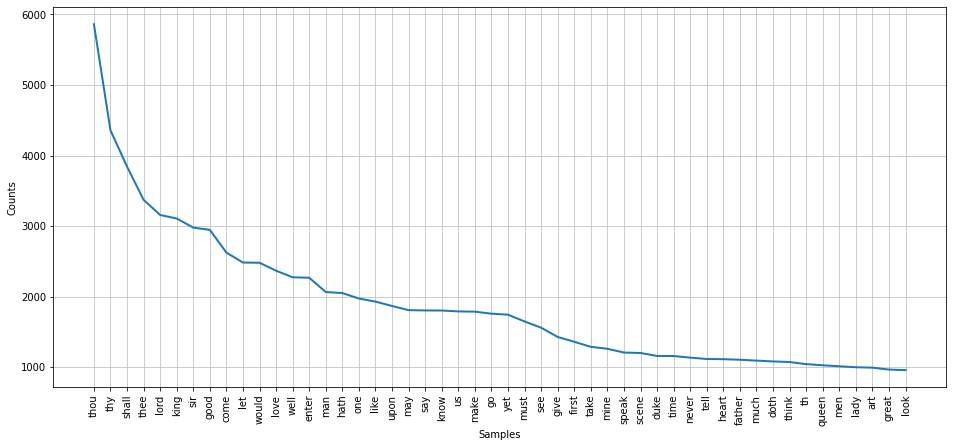

In [ ]:
t0 = time.time()# Start time

####################
## Frequency plot ##
####################
# Generate a frequency distribution for the tokens
shakespeare_FreqDist = FreqDist( shakespeare_tokens )

# Big figure
plt.rcParams["figure.figsize"] = [16,7]

# Display plot with top 50 tokens
shakespeare_FreqDist.plot( 50 )

t1 = time.time() # End time

## We use this data for another Code it, so let's save a copy
# Write the tokens to /working/ folder 
with open('shakespeare_tokens.pkl', 'wb') as f:
    pickle.dump( shakespeare_tokens , f )

In [ ]:
# Print the time elapsed between t0 and the current time
print( "This block took", round( t1-t0 ), "seconds to complete." ) # 1s

This block took 1 seconds to complete.


### Back to timings

As you can see, the step that took almost all of the time (over a minute!) was this line:

```shakespeare_tokens = [token for token in shakespeare_tokens if not token in set(stopwords.words('english'))]```

What's taking so long and how can we speed it up? The first answer is easy: it's going slow because we are looking up every single token and comparing it to the stopwords list that comes with NLTK.

## Let's try to speed it up

There's no point in looking up a particular token more than once, so we can reduce the time it takes to execute the code by checking each unique word in the text against the stopword list.

>**In the next code block we reduce the runtime from 2 minutes to 3 seconds!**

In [ ]:
# Convert the shakespeare_tokens to a set, which collapses across identical members
# This will leave us only unique tokens
shakespeare_tokens_set = set( shakespeare_tokens )

# How many unique tokens (set version of the cleaned token list)?
set_length = len( shakespeare_tokens_set )

# How many cleaned tokens are there?
list_length = len( shakespeare_tokens ) 

# Print a message with the differences quantified
print("We reduced the token count by", list_length - set_length, "tokens.") # 470002 tokens


We reduced the token count by 469668 tokens.


In [ ]:
t0 = time.time()# Start time

# Let's remove the stopwords from the set version
shakespeare_tokens_r = [token for token in shakespeare_tokens_set if not token in set(stopwords.words('english'))]

t1 = time.time() # End time


In [ ]:
# Print the time elapsed between t0 and the current time
print( "This block took", round( t1-t0 ), "seconds to complete." ) # 3s

This block took 4 seconds to complete.
